# CHURN  Data


## using Logistic Regression

In [169]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
dataset_not_adjust = pd.read_csv('/mnt/1A746F7B746F5891/L U N I X/Machine learning/datasets/churns/churn_train.csv')
#drop rows to be string number
dataset=dataset_not_adjust.drop(dataset.index[[-1,-2]])
dataset
features = dataset.iloc[:,1:-2].values
goal = dataset.iloc[:,-1].values
dataset

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0038,117,3.90,49.6700,0.00,38.75,6.941061e+03,1,0,1092,1,0,2,1,1,0
1,ADF0039,123,4.10,76.7140,0.00,1.25,1.495100e+00,14,564,6408,2,1,1,5,1,0
2,ADF0040,1342,44.73,76.9200,11.96,1.25,7.514600e+00,5,251,1004,2,2,2,3,1,0
3,ADF0041,1316,43.87,98.8904,4.14,1.25,1.024400e+00,27,1626,4373,1,1,1,5,1,0
4,ADF0042,247,8.23,152.9120,0.02,15.00,3.241738e+07,6,12,1145,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,ADF1993,1843,61.43,933.1400,0.01,0.00,2.024585e+06,249,0,179,4,2,2,4,3,1
1391,ADF1994,208,6.93,968.1620,164.05,356.25,2.664477e+05,8,0,1959,1,2,2,3,3,1
1392,ADF1995,161,5.37,1109.1980,22.64,6.25,9.781816e+02,385,11700,67635,1,0,0,3,3,1
1393,ADF1996,1458,48.60,1449.8700,0.00,20.00,8.781532e+06,170,4104,77050,1,1,1,3,3,1


In [193]:

# # standrize the values
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features = scaler.fit_transform(features)

# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.2,random_state=0)
train_set

array([[1.221000e+03, 4.070000e+01, 7.690684e+02, ..., 2.000000e+00,
        2.000000e+00, 1.000000e+00],
       [1.053000e+03, 3.510000e+01, 9.433100e+02, ..., 2.000000e+00,
        2.000000e+00, 5.000000e+00],
       [2.150000e+02, 7.170000e+00, 1.082550e+03, ..., 2.000000e+00,
        2.000000e+00, 5.000000e+00],
       ...,
       [1.174000e+03, 3.913000e+01, 1.300940e+03, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       [3.504000e+03, 1.168000e+02, 3.670020e+02, ..., 2.000000e+00,
        1.000000e+00, 5.000000e+00],
       [1.330000e+02, 4.430000e+00, 6.435900e+02, ..., 2.000000e+00,
        2.000000e+00, 3.000000e+00]])

In [195]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

/mnt/1A746F7B746F5891/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate the LR module
##using Confusion matrix

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

,0,1
0,117,25
1,105,32


# Evaluste Accuracy

In [198]:
logistic.score(test_set, goal_test)

0.5340501792114696

## Plot function 

In [199]:
# # define a function that return whatever degree polynomial you want
# def getPolynomial(data,degree=1):
#     if degree == 1 :
#         return data 
#     from sklearn.preprocessing import PolynomialFeatures
#     poly = PolynomialFeatures(degree= degree)
#     poly_features = poly.fit_transform(data)
#     return poly_features
# define a function for plotting
def plot(feature = [], actual = [], predicted = [], alpha = 1):
    plt.plot(feature, actual, '-')
#     plt.legend(handles="actual")
    plt.plot( feature, predicted, '*')
#     plt.legend(handles="predicted")
    plt.title('alpha = {}'.format(alpha))
    plt.show()

In [200]:
# poly_features = getPolynomial(features, 13)
pd.DataFrame(train_set)# replace poly_features as features

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1221.0,40.70,769.0684,12.82,51.25,1.609946e+06,523.0,2379.0,8867.0,1.0,2.0,2.0,1.0
1,1053.0,35.10,943.3100,6.72,20.00,2.298119e+05,151.0,3819.0,2390.0,2.0,2.0,2.0,5.0
2,215.0,7.17,1082.5500,5.98,5.00,3.181992e+06,813.0,0.0,1432.0,1.0,2.0,2.0,5.0
3,1284.0,42.80,113.3880,10.50,8.75,2.286556e+04,64.0,946.0,2987.0,2.0,1.0,1.0,5.0
4,2557.0,85.23,14.2100,0.00,0.00,4.166870e+04,3.0,24.0,490.0,2.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,325.0,10.83,866.3500,4.17,3.75,2.779688e+02,289.0,36300.0,4567.0,2.0,1.0,1.0,1.0
1112,152.0,5.07,968.4500,0.00,0.00,1.260825e+06,369.0,2464.0,3349.0,1.0,0.0,0.0,5.0
1113,1174.0,39.13,1300.9400,2.35,27.50,1.831580e+06,334.0,6420.0,33346.0,1.0,0.0,0.0,2.0
1114,3504.0,116.80,367.0020,27.45,12.50,7.254143e+05,50.0,5367.0,6944.0,8.0,2.0,1.0,5.0


# Using Ridge !
### cost = RSS + alpha x (L2)
where l2 is the sum squars of the coeff(s)

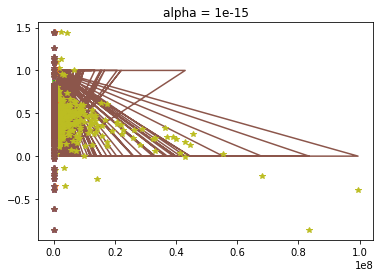

------------------


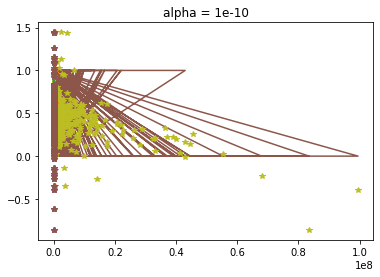

------------------


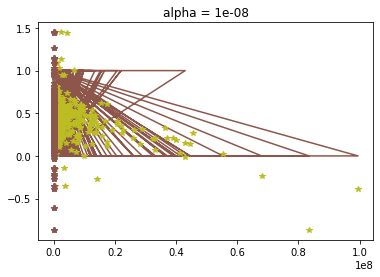

------------------


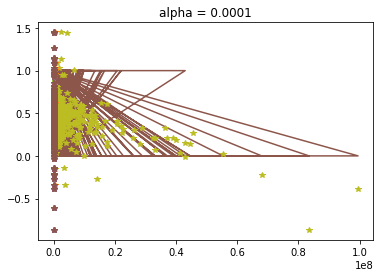

------------------


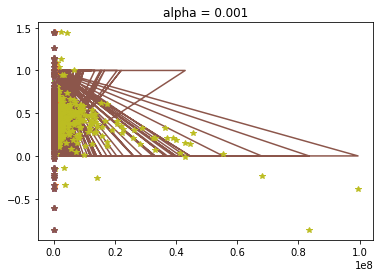

------------------


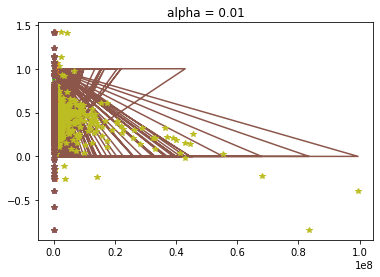

------------------


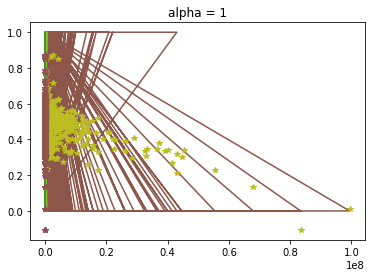

------------------


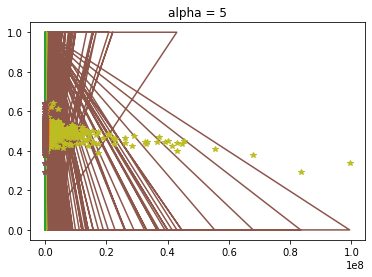

------------------


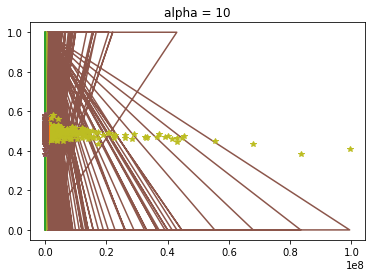

------------------


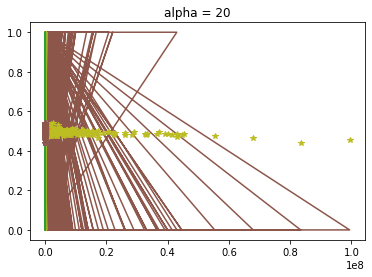

------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.087986,-2.640731,-1.148232e-04,0.001017,0.000182,-9.694909e-09,-0.000216,-1.363851e-06,4.787071e-06,-0.009935,0.042516,-0.073249,-0.019147
1,0.083746,-2.513514,-1.147449e-04,0.001017,0.000182,-9.696433e-09,-0.000216,-1.363383e-06,4.785722e-06,-0.009938,0.042476,-0.073213,-0.019148
2,0.014497,-0.436059,-1.134664e-04,0.001014,0.000179,-9.721319e-09,-0.000218,-1.355732e-06,4.763686e-06,-0.009989,0.041808,-0.072628,-0.019163
3,-0.000017,-0.000622,-1.130703e-04,0.001013,0.000178,-9.727031e-09,-0.000218,-1.354074e-06,4.756388e-06,-0.009999,0.041633,-0.072474,-0.019166
4,-0.000019,-0.000575,-1.119297e-04,0.001011,0.000176,-9.731330e-09,-0.000219,-1.353538e-06,4.732480e-06,-0.009995,0.041318,-0.072193,-0.019165
5,-0.000019,-0.000572,-1.016667e-04,0.000992,0.000157,-9.760135e-09,-0.000225,-1.344307e-06,4.511917e-06,-0.009950,0.038343,-0.069519,-0.019132
6,-0.000015,-0.000463,-9.081452e-06,0.000493,0.000021,-5.387188e-09,-0.000116,-2.006717e-07,1.001702e-06,-0.005756,-0.006357,-0.020703,-0.010406
7,-0.000007,-0.000218,-2.087062e-06,0.000173,0.000008,-1.817865e-09,-0.000037,8.635858e-09,2.515127e-07,-0.002122,-0.005155,-0.007830,-0.003488
8,-0.000004,-0.000130,-1.116880e-06,0.000096,0.000005,-9.958347e-10,-0.000020,1.216993e-08,1.289731e-07,-0.001194,-0.003250,-0.004527,-0.001906
9,-0.000002,-0.000072,-5.892454e-07,0.000050,0.000002,-5.231634e-10,-0.000011,8.354732e-09,6.506786e-08,-0.000638,-0.001846,-0.002464,-0.001000


In [201]:
coeff_matrix = []

for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    
    ridge = Ridge(alpha = alpha, normalize=True)
#     ridge.fit(poly_features, salarys)
    ridge.fit(train_set,goal_train)
    coeff_matrix.append(ridge.coef_)
#     plot(features, salarys, ridge.predict(poly_features), alpha=alpha)
    plot(train_set, goal_train,ridge.predict(train_set),alpha=alpha)
    print('------------------')
pd.DataFrame(coeff_matrix)

In [135]:
print("shape of Y_predict is {}\nshape of Y_test is {}".format (ridge.predict(test_set).shape,goal_test.shape))
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(goal_test, ridge.predict(test_set))
# pd.DataFrame(cm)

shape of Y_predict is (400,)
shape of Y_test is (400,)


# Using KNN and with multiple K's

In [202]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_set, goal_train)
for K in [1, 2,3,4, 5, 10, 20, 100, 150, len(train_set)]:

    classifier = KNeighborsClassifier(n_neighbors=K)

    classifier.fit(train_set, goal_train)

    cm = confusion_matrix(goal_test, classifier.predict(test_set))

    print('K = %d\n-------------'%K)

    print(pd.DataFrame(cm))

    print("model accuracy : {:.4f}".format(classifier.score(test_set, goal_test)))

    print('-------------\n\n')

K = 1
-------------
    0   1
0  92  50
1  61  76
model accuracy : 0.6022
-------------


K = 2
-------------
     0   1
0  113  29
1   77  60
model accuracy : 0.6201
-------------


K = 3
-------------
    0   1
0  96  46
1  57  80
model accuracy : 0.6308
-------------


K = 4
-------------
     0   1
0  112  30
1   68  69
model accuracy : 0.6487
-------------


K = 5
-------------
     0   1
0  100  42
1   57  80
model accuracy : 0.6452
-------------


K = 10
-------------
     0   1
0  103  39
1   63  74
model accuracy : 0.6344
-------------


K = 20
-------------
     0   1
0  107  35
1   69  68
model accuracy : 0.6272
-------------


K = 100
-------------
     0   1
0  110  32
1   70  67
model accuracy : 0.6344
-------------


K = 150
-------------
     0   1
0  107  35
1   70  67
model accuracy : 0.6237
-------------


K = 1116
-------------
   0    1
0  0  142
1  0  137
model accuracy : 0.4910
-------------




## From above we get that the KNN model(for k=4 accuracy=0..6487) is mor accurate than logistic regression(accuracy=0.534)


# Naive Bayes classification 

In [203]:
# standrize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.2,random_state=0)
pd.DataFrame(train_set)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.180942,-0.180942,-0.024697,-0.287077,-0.021779,-0.076425,1.060548,-0.263320,-0.178245,-0.393278,0.998087,0.932039,-1.317484
1,-0.312521,-0.312522,0.115119,-0.387518,-0.130005,-0.280356,-0.170120,-0.176788,-0.354067,0.032671,0.998087,0.932039,0.901520
2,-0.968851,-0.968774,0.226848,-0.399703,-0.181953,0.155863,2.019939,-0.406280,-0.380073,-0.393278,0.998087,0.932039,0.901520
3,-0.131599,-0.131600,-0.550833,-0.325278,-0.168966,-0.310935,-0.457937,-0.349432,-0.337861,0.032671,-0.143168,-0.212498,0.901520
4,0.865427,0.865350,-0.630416,-0.498168,-0.199269,-0.308156,-0.659740,-0.404837,-0.405644,0.032671,-0.143168,-0.212498,0.901520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,-0.882698,-0.882778,0.053364,-0.429506,-0.186282,-0.314272,0.286418,1.775064,-0.294971,0.032671,-0.143168,-0.212498,-1.317484
1112,-1.018193,-1.018117,0.135292,-0.498168,-0.199269,-0.128012,0.551078,-0.258213,-0.328035,-0.393278,-1.284424,-1.357036,0.901520
1113,-0.217753,-0.217831,0.402090,-0.459473,-0.104031,-0.043676,0.435289,-0.020488,0.486253,-0.393278,-1.284424,-1.357036,-0.762733
1114,1.607127,1.607129,-0.347326,-0.046184,-0.155979,-0.207125,-0.504253,-0.083765,-0.230446,2.588368,0.998087,-0.212498,0.901520


In [204]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_set, goal_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [206]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, classifier.predict(test_set))
print(classifier.score(test_set, goal_test))
pd.DataFrame(cm)

0.5161290322580645


,0,1
0,107,35
1,100,37


# The Results KNN is more accurat at k=4 and accuracy=0.6487